<a href="https://colab.research.google/github/jhermosillo/Escuela_CD_IMATE_2019/blob/master/04%20Clasificacion_Agrupamiento/Notebooks/Regresion_Bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table >
  <thead>
  <tr>
    <th colspan="2"><img src="../img/data_science_rec.jpg" width="100%"/></th>
  </tr>
  <tr>
    <td><font size="6"><p style="text-align:left;"><b>Diplomado en <br>Ciencia de Datos con Python</b></p></font></td>
    <td width="13%"><img src="../img/uaem.jpg"/></td>
  </tr>
  <tr>
      <td><font size="7">Regresión Bayesiana</font></td>
    <td width="13%"><img src="../img/logoCInC.jpg" /></td>
  </tr>
  </thead>
</table>


##  &#9991; <u>I. Regresión Lineal clásica</u>

Recordemos el caso de la regresión lineal clásica. &#9775; NOCIONES BÁSICAS EN RECONOCIMIENTO DE PATRONES


___

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

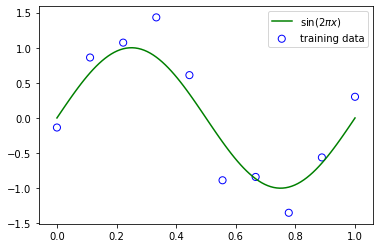

In [36]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

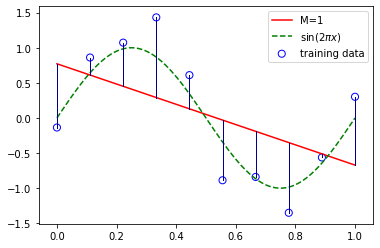

In [37]:
# transforming the data to include another axis
x = x_train[:, np.newaxis]
y = y_train[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x, y_pred, color='r',label="M=1")
plt.plot(x_test, y_test, c="g", ls='--', label="$\sin(2\pi x)$")
plt.plot(np.vstack([x_train,x_train]), np.vstack([y_train, y_pred.ravel()]), color="darkblue",lw=1);
plt.legend()
plt.show()

In [38]:
print("Parametros del modelo:    ", model.coef_)
print("W0:  ", model.intercept_)

Parametros del modelo:     [[-1.44]]
W0:   [0.77]


In [39]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)


0.7688616522160824
0.26399313682066683


0.26196798611782035
0.9145559341728049
Parametros del modelo:     [ -0.21  15.24 -44.56  29.95]


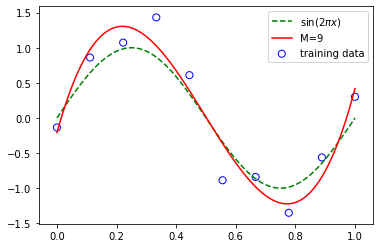

In [40]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

x_poly_test = polynomial_features.fit_transform(x_test[:, np.newaxis])

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

y_poly_test = model.predict(x_poly_test)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

np.set_printoptions(suppress=True,precision=2)

print(rmse)
print(r2)
ws= model.coef_.ravel()
ws[0]=model.intercept_[0]
print("Parametros del modelo:    ",ws)

plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", ls='--', label="$\sin(2\pi x)$")
plt.plot(x_test, y_poly_test, color='r',label="M=9")
plt.legend()
plt.show()

0.13872984761430288
0.9718370736751236
Parametros del modelo:     [  0.28  10.55 -42.76  60.48 -53.13  24.92]


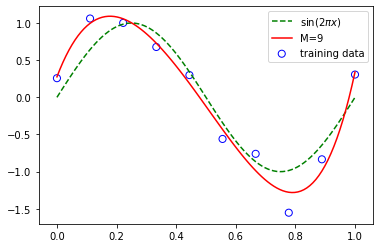

In [111]:
x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x = x_train[:, np.newaxis]
y = y_train[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

x_poly_test = polynomial_features.fit_transform(x_test[:, np.newaxis])

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

y_poly_test = model.predict(x_poly_test)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

np.set_printoptions(suppress=True,precision=2)

print(rmse)
print(r2)
ws= model.coef_.ravel()
ws[0]=model.intercept_[0]
print("Parametros del modelo:    ",ws)

plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", ls='--', label="$\sin(2\pi x)$")
plt.plot(x_test, y_poly_test, color='r',label="M=9")
plt.legend()
plt.show()

x_nReg=x_test
y_nReg=y_poly_test

In [112]:
from sklearn.linear_model import Ridge


alpha1=1.0 #ln alpha=0
alpha2=1.57E-8 #ln alpha = -18
alpha3=1.0E-20   #ln alpha = -inf

clf = Ridge(alpha=alpha2)
clf.fit(x_poly, y)
y_poly_pred = clf.predict(x_poly)

y_poly_test = clf.predict(x_poly_test)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
rr2 = clf.score(x_poly,y)

print(rmse,r2,rr2)

0.1387302684470676 0.9718369028121071 0.9718369028121071


[  0.    10.53 -42.58  59.97 -52.56  24.7 ]


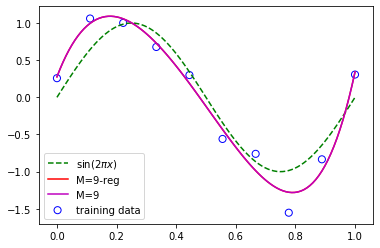

In [113]:
ws=clf.coef_.ravel()
print(ws)

plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", ls='--', label="$\sin(2\pi x)$")
plt.plot(x_test, y_poly_test, color='r',label="M=9-reg")
plt.plot(x_nReg, y_nReg, color='m',label="M=9")
plt.legend()
plt.show()

[  0.     4.56 -12.38  -0.     0.     7.63]


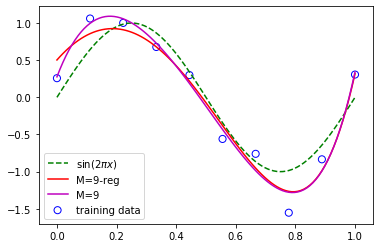

In [114]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.001)

reg.fit(x_poly, y)
y_poly_pred = reg.predict(x_poly)

y_poly_test = reg.predict(x_poly_test)

ws=reg.coef_.ravel()
print(ws)

plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", ls='--', label="$\sin(2\pi x)$")
plt.plot(x_test, y_poly_test, color='r',label="M=9-reg")
plt.plot(x_nReg, y_nReg, color='m',label="M=9")
plt.legend()
plt.show()

___

### II.4. Distribuciones Conjugadas

### II. Ejemplo: densidad Gaussiana
La función de densidad de probabilidad Gaussiana se utiliza muy amplimente en problemas de modelación de VA continuas.

$$
\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}
$$